### Deliverable 1: Preprocessing the Data for a Neural Network

In [14]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv('/content/charity_data.csv')
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [15]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"], axis=1)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [16]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [17]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [18]:
application_df.SPECIAL_CONSIDERATIONS.value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [19]:
application_df['SPECIAL_CONSIDERATIONS'].replace({'N': 0,'Y':1},inplace =True)
application_df.SPECIAL_CONSIDERATIONS.value_counts()

0    34272
1       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [20]:
application_df.loc[:, "APPLICATION_TYPE"].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [21]:
application_df['APPLICATION_TYPE'].replace({'T':''},inplace=True,regex=True)
application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].astype(int)
application_df.loc[:, "APPLICATION_TYPE"].value_counts()

3     27037
4      1542
6      1216
5      1173
19     1065
8       737
7       725
10      528
9       156
13       66
12       27
2        16
25        3
14        3
15        2
29        2
17        1
Name: APPLICATION_TYPE, dtype: int64

In [22]:
application_df.loc[:, "CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2570        1
C1580        1
C1283        1
C2561        1
C1900        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [23]:
application_df['CLASSIFICATION'].replace({'C':''},inplace=True,regex=True)
application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].astype(int)
application_df.loc[:, "CLASSIFICATION"].value_counts()

1000    17326
2000     6074
1200     4837
3000     1918
2100     1883
        ...  
4200        1
2570        1
5200        1
2380        1
2190        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [24]:
application_df.dtypes

APPLICATION_TYPE           int64
AFFILIATION               object
CLASSIFICATION             int64
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS     int64
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [25]:
application_df.loc[:, "INCOME_AMT"].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [26]:
application_df['INCOME_AMT'].replace({'1-9999':10000,'10000-24999':25000,'25000-99999':100000,'100000-499999':500000,'1M-5M':5000000,'5M-10M':10000000,'10M-50M':50000000,'50M+':100000000},inplace=True,regex=False)
application_df.loc[:, "INCOME_AMT"].value_counts()

0            24388
100000        3747
500000        3374
5000000        955
10000          728
25000          543
50000000       240
10000000       185
100000000      139
Name: INCOME_AMT, dtype: int64

In [27]:
application_df['INCOME_AMT'] = application_df['INCOME_AMT'].astype(int)
application_df.dtypes

APPLICATION_TYPE           int64
AFFILIATION               object
CLASSIFICATION             int64
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                 int64
SPECIAL_CONSIDERATIONS     int64
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [28]:
application_df.loc[:, "ORGANIZATION"].value_counts()

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [29]:
application_df['ORGANIZATION'].replace({'Trust':10,'Association':20,'Co-operative':30,'Corporation':40},inplace=True,regex=False)
application_df['ORGANIZATION'] = application_df['ORGANIZATION'].astype(int)
application_df.loc[:, "ORGANIZATION"].value_counts()

10    23515
20    10255
30      486
40       43
Name: ORGANIZATION, dtype: int64

In [30]:
application_df.loc[:, "USE_CASE"].value_counts()

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [31]:
application_df['USE_CASE'].replace({'Preservation':15,'ProductDev':25,'CommunityServ':35,'Heathcare':45,'Other':5},inplace=True,regex=False)
application_df['USE_CASE'] = application_df['USE_CASE'].astype(int)
application_df.loc[:, "USE_CASE"].value_counts()

15    28095
25     5671
35      384
45      146
5         3
Name: USE_CASE, dtype: int64

In [32]:
application_value_counts = application_df.loc[:, "AFFILIATION"].value_counts()
application_value_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [33]:
application_df['AFFILIATION'].replace({'Independent':150,'CompanySponsored':200,'Family/Parent':250,'National':300,'Regional':350,'Other':50},inplace=True,regex=False)
application_df['AFFILIATION'] = application_df['AFFILIATION'].astype(int)
application_df.loc[:, "AFFILIATION"].value_counts()

150    18480
200    15705
250       64
300       33
350       13
50         4
Name: AFFILIATION, dtype: int64

In [34]:
application_df.dtypes

APPLICATION_TYPE          int64
AFFILIATION               int64
CLASSIFICATION            int64
USE_CASE                  int64
ORGANIZATION              int64
STATUS                    int64
INCOME_AMT                int64
SPECIAL_CONSIDERATIONS    int64
ASK_AMT                   int64
IS_SUCCESSFUL             int64
dtype: object

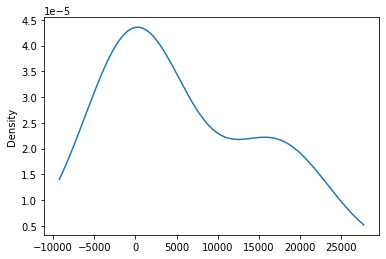

In [35]:
# Visualize the value counts of APPLICATION_TYPE
application_value_counts.plot(kind="density")

In [36]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()
application_cat

[]

In [37]:
# Split our preprocessed data into our features and target arrays
y = application_df.loc[:, "IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [38]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled

array([[-0.34981212,  1.04450084, -0.35714529, ..., -0.13176566,
        -0.02858365, -0.03145581],
       [-0.34981212, -0.9107269 , -0.53506454, ..., -0.13176566,
        -0.02858365, -0.03145581],
       [-0.34981212,  1.04450084, -0.53506454, ..., -0.13176566,
        -0.02858365, -0.03145581],
       ...,
       [-0.34981212, -0.9107269 , -0.35714529, ..., -0.13176566,
        -0.02858365, -0.03145581],
       [-0.34981212,  1.04450084, -0.53506454, ..., -0.13176566,
        -0.02858365, -0.03145581],
       [-0.34981212, -0.9107269 , -0.53506454, ..., -0.13176566,
        -0.02858365, -0.03145581]])

In [39]:
len(X_train[0])

9

### Deliverable 2: Compile, Train and Evaluate the Model

In [41]:
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 30
hidden_nodes_layer2 = 15
hidden_nodes_layer3 = 7
## 0.65
# hidden_nodes_layer1 = 70
# hidden_nodes_layer2 = 90
# hidden_nodes_layer3 = 50
# hidden_nodes_layer4 = 30
# hidden_nodes_layer5 = 10
# ## 0.5351

# hidden_nodes_layer1 = 80
# hidden_nodes_layer2 = 90
# hidden_nodes_layer3 = 70
# ## 0.5350 

# hidden_nodes_layer1 = 90
# hidden_nodes_layer2 = 50
# ## 
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# # Fourth hidden layer
# nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# # Fifth hidden layer
# nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                300       
                                                                 
 dense_5 (Dense)             (None, 15)                465       
                                                                 
 dense_6 (Dense)             (None, 7)                 112       
                                                                 
 dense_7 (Dense)             (None, 1)                 8         
                                                                 
Total params: 885
Trainable params: 885
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:03d}.hdf5"

# Train the model
checkpoint = tf.keras.callbacks.ModelCheckpoint(
     filepath=checkpoint_path,
    monitor="val_loss",
    verbose=1,
    save_best_only=True,    
    mode="auto",
    save_freq='epoch'
)
# Fit the model to the training data
fit_model = nn_model.fit(
    X_train_scaled, y_train, epochs=100, callbacks=[checkpoint], validation_split=0.2
)

Epoch 1/100
617/644 [===========================>..] - ETA: 0s - loss: 0.6171 - accuracy: 0.6751
Epoch 00001: val_loss improved from inf to 0.58477, saving model to checkpoints/weights.001.hdf5
644/644 [==============================] - 3s 3ms/step - loss: 0.6160 - accuracy: 0.6765 - val_loss: 0.5848 - val_accuracy: 0.7188
Epoch 2/100
636/644 [============================>.] - ETA: 0s - loss: 0.5912 - accuracy: 0.7060
Epoch 00002: val_loss improved from 0.58477 to 0.57493, saving model to checkpoints/weights.002.hdf5
644/644 [==============================] - 2s 2ms/step - loss: 0.5911 - accuracy: 0.7060 - val_loss: 0.5749 - val_accuracy: 0.7201
Epoch 3/100
633/644 [============================>.] - ETA: 0s - loss: 0.5835 - accuracy: 0.7156
Epoch 00003: val_loss improved from 0.57493 to 0.57183, saving model to checkpoints/weights.003.hdf5
644/644 [==============================] - 2s 2ms/step - loss: 0.5832 - accuracy: 0.7160 - val_loss: 0.5718 - val_accuracy: 0.7318
Epoch 4/100
633/6

In [45]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5572 - accuracy: 0.7277 - 308ms/epoch - 1ms/step
Loss: 0.5572130084037781, Accuracy: 0.7276967763900757


In [46]:
# Attempt #2 
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 30
## 0.65
# hidden_nodes_layer1 = 70
# hidden_nodes_layer2 = 90
# ## 0.5351

# hidden_nodes_layer1 = 80
# ## 0.5350 

# hidden_nodes_layer1 = 90
# ## 

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# # Second hidden layer
# nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# # Third hidden layer
# nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# # Fourth hidden layer
# nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# # Fifth hidden layer
# nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                300       
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [48]:
# Train the model
# Define the checkpoint path and filenames
os.makedirs("checkpoints_v1/",exist_ok=True)
checkpoint_path = "checkpoints_v1/weights.{epoch:03d}.hdf5"

# Train the model
checkpoint = tf.keras.callbacks.ModelCheckpoint(
     filepath=checkpoint_path,
    monitor="val_loss",
    verbose=1,
    save_best_only=True,    
    mode="auto",
    save_freq='epoch'
)
# Fit the model to the training data
fit_model = nn_model.fit(
    X_train_scaled, y_train, epochs=100, callbacks=[checkpoint], validation_split=0.2
)

Epoch 1/100
639/644 [============================>.] - ETA: 0s - loss: 0.6227 - accuracy: 0.6664
Epoch 00001: val_loss improved from inf to 0.59403, saving model to checkpoints_v1/weights.001.hdf5
644/644 [==============================] - 2s 3ms/step - loss: 0.6230 - accuracy: 0.6660 - val_loss: 0.5940 - val_accuracy: 0.6985
Epoch 2/100
642/644 [============================>.] - ETA: 0s - loss: 0.6040 - accuracy: 0.6880
Epoch 00002: val_loss improved from 0.59403 to 0.58837, saving model to checkpoints_v1/weights.002.hdf5
644/644 [==============================] - 1s 2ms/step - loss: 0.6040 - accuracy: 0.6879 - val_loss: 0.5884 - val_accuracy: 0.7108
Epoch 3/100
637/644 [============================>.] - ETA: 0s - loss: 0.5987 - accuracy: 0.7005
Epoch 00003: val_loss improved from 0.58837 to 0.58328, saving model to checkpoints_v1/weights.003.hdf5
644/644 [==============================] - 1s 2ms/step - loss: 0.5984 - accuracy: 0.7007 - val_loss: 0.5833 - val_accuracy: 0.7213
Epoch 4/

In [50]:
# Attempt#2  Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5691 - accuracy: 0.7268 - 273ms/epoch - 1ms/step
Loss: 0.5690805912017822, Accuracy: 0.7267638444900513


In [59]:
# Attempt #3
number_input_features = len(X_train[0])

hidden_nodes_layer1 = 25
hidden_nodes_layer2 = 70
hidden_nodes_layer3 = 35
hidden_nodes_layer4 = 20
hidden_nodes_layer5 = 10
## 0.5351

# hidden_nodes_layer1 = 80
# ## 0.5350 

# hidden_nodes_layer1 = 90
# ## 

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Fifth hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 25)                250       
                                                                 
 dense_19 (Dense)            (None, 70)                1820      
                                                                 
 dense_20 (Dense)            (None, 35)                2485      
                                                                 
 dense_21 (Dense)            (None, 20)                720       
                                                                 
 dense_22 (Dense)            (None, 10)                210       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,496
Trainable params: 5,496
Non-traina

In [60]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [61]:
# Train the model
os.makedirs("checkpoints_v2/",exist_ok=True)
checkpoint_path = "checkpoints_v2/weights.{epoch:03d}.hdf5"

# Train the model
checkpoint = tf.keras.callbacks.ModelCheckpoint(
     filepath=checkpoint_path,
    monitor="val_loss",
    verbose=1,
    save_best_only=True,    
    mode="auto",
    save_freq='epoch'
)
# Fit the model to the training data
fit_model = nn_model.fit(
    X_train_scaled, y_train, epochs=100, callbacks=[checkpoint], validation_split=0.2
)

Epoch 1/100
643/644 [============================>.] - ETA: 0s - loss: 0.6186 - accuracy: 0.6746
Epoch 00001: val_loss improved from inf to 0.58518, saving model to checkpoints_v2/weights.001.hdf5
644/644 [==============================] - 3s 3ms/step - loss: 0.6186 - accuracy: 0.6747 - val_loss: 0.5852 - val_accuracy: 0.7267
Epoch 2/100
623/644 [============================>.] - ETA: 0s - loss: 0.5901 - accuracy: 0.7176
Epoch 00002: val_loss improved from 0.58518 to 0.57517, saving model to checkpoints_v2/weights.002.hdf5
644/644 [==============================] - 2s 3ms/step - loss: 0.5902 - accuracy: 0.7177 - val_loss: 0.5752 - val_accuracy: 0.7293
Epoch 3/100
630/644 [============================>.] - ETA: 0s - loss: 0.5828 - accuracy: 0.7233
Epoch 00003: val_loss improved from 0.57517 to 0.57175, saving model to checkpoints_v2/weights.003.hdf5
644/644 [==============================] - 2s 3ms/step - loss: 0.5824 - accuracy: 0.7235 - val_loss: 0.5718 - val_accuracy: 0.7361
Epoch 4/

In [62]:
# Attempt#3  Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5542 - accuracy: 0.7307 - 323ms/epoch - 1ms/step
Loss: 0.5542434453964233, Accuracy: 0.7307288646697998
